<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/collect_sarcasm/sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bài tập: Sarcasm Detection**

#**Nhóm thực hiện**
- 19522020 - Lại Nguyễn Vĩnh Phú
- 19521299 - Nguyễn Chí Cường
- 19522447 - Trương Thế Trương

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sn
import pickle

#**Lấy data và xử lý**

In [ ]:
nltk.download('stopwords')
def processing(text):
  remove_punc = [char for char in text if char not in string.punctuation]
  sent = ''.join(remove_punc)
  result = [word for word in sent.split() if word.lower() not in stopwords.words('english')]
  return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#data_train
#read data sarcasm detection
#https://github.com/phutaekwondo/CS114.L21/tree/main/collect_sarcasm
data_text = pd.read_csv('https://raw.githubusercontent.com/phutaekwondo/CS114.L21/main/collect_sarcasm/sarcasm_train.csv')
data_text = data_text.dropna().reset_index()
df_train = data_text[['headline', 'is_sarcastic']]
df_train

,headline,is_sarcastic
0,Labor pledges to double their heart-felt state...,1
1,Morrison asks Queen if she’s a lizard,1
2,Order of Australia recipient Peta Credlin hono...,1
3,PM fucking off to Hawaii during fires somehow ...,1
4,Local MP only got into politics so they could ...,1
...,...,...
54884,Taking business into Welsh schools,0
54885,Women entrepreneurs could be answer to crisis,0
54886,Branson's grim train warning,0
54887,Business parties in Swedish countryside,0


In [ ]:
#data_test
df_test = pd.read_csv('https://raw.githubusercontent.com/phutaekwondo/CS114.L21/main/collect_sarcasm/sarcasm_test.csv')[['headline', 'is_sarcastic']]
df_test

,headline,is_sarcastic
0,School kid who didn't revise and prayed for a ...,0
1,Pub fruit machine dreamt of being vending mach...,0
2,Meghan to embrace British culture by carrying ...,0
3,Charlie Hebdo,0
4,Git of the Year,0
...,...,...
21306,"Absolutely, positively, the best election vide...",1
21307,"Sheffield Hallam was Nick Clegg’s seat. Well, ...",1
21308,Still awake? Celebrate with our favourite twee...,1
21309,RIP UKIP – top 10 tweets as Paul Nuttall goes ...,1


In [ ]:
#data của Lan Phương
#https://github.com/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENT_14_06/data/data_train.csv
df_test_LanPhuong = pd.read_csv('https://raw.githubusercontent.com/lphuong304/CS114.L21/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENT_14_06/data/data_train.csv')[['headline', 'is_sarcastic']]
df_test_LanPhuong

,headline,is_sarcastic
0,Deadliest states for drug overdose...,0
1,Is Vietnam the Next ‘Asian Miracle’?,0
2,Trump Rows Across Great Lakes In Surprise Atta...,1
3,Top Emirates adviser cooperating w...,0
4,Deadliest states for drug overdose...,0
...,...,...
118138,Review: ‘Tuca & Bertie’ Is an Eggsellent Adven...,0
118139,Italy Charges Egyptian Security Agents in Stud...,0
118140,Ted Bundy: The serial killer's fin...,0
118141,When the Closer Isn’t Closing,0


#**Dùng Countvectorizer - Vectore Space Model**

##**Visualise Data**

In [ ]:
import matplotlib.pyplot as plt
#Nguồn nhóm của Lan Phương
def Visualize_data(data_frame):
  fig=plt.figure(figsize=(8,6))
  background_color = '#f6f5f7'
  fig.patch.set_facecolor(background_color) 
  ax=plt.subplot(1,1,1)
  ax.set_facecolor(background_color)
  ax.set_title('Visualize Data',fontweight='bold',fontfamily='serif')
  for i in ['top','right']:
    ax.spines[i].set_visible(False)
  ax.grid(linestyle=':',axis='y')
  sn.countplot(data_frame['is_sarcastic'],palette='PuOr_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


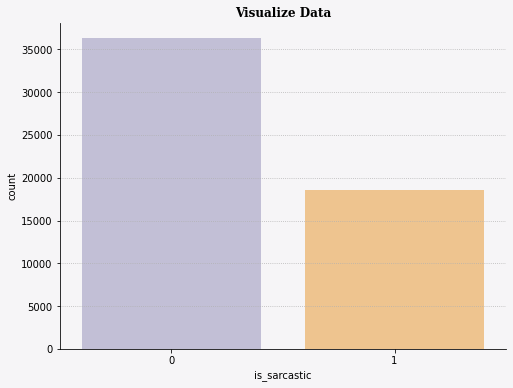

In [ ]:
Visualize_data(df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


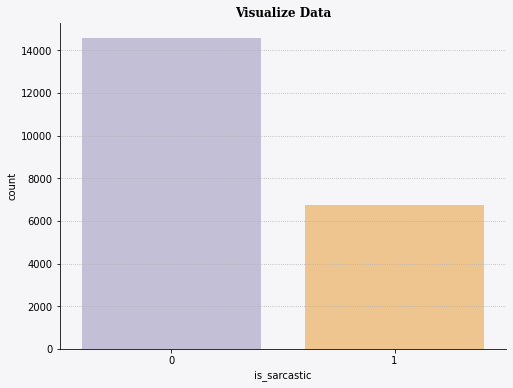

In [ ]:
Visualize_data(df_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


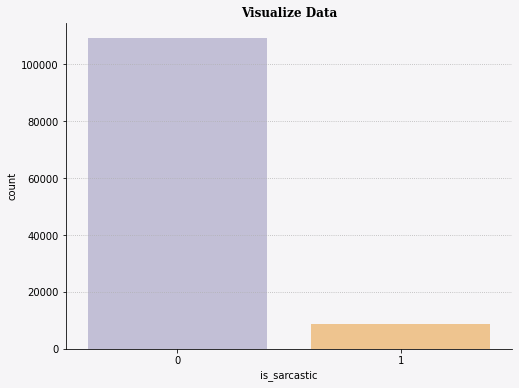

In [ ]:
Visualize_data(df_test_LanPhuong)

##**Build model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X_train, X_test = df_train['headline'], df_test['headline']
y_train, y_test = df_train['is_sarcastic'], df_test['is_sarcastic']

In [ ]:
X_test_LP, y_test_LP = df_test_LanPhuong['headline'], df_test_LanPhuong['is_sarcastic']

In [ ]:
#extract feature
#dùng CountVectorizer
vectorizer = CountVectorizer(analyzer=processing)
def extraction_feature(train, test):
  feature_train = vectorizer.fit_transform(train) #train
  feature_test = CountVectorizer(analyzer=processing, vocabulary=vectorizer.vocabulary_).fit_transform(test) #test
  return feature_train, feature_test

In [ ]:
feature = extraction_feature(X_train, X_test)

In [ ]:
#rút feature data của nhóm bạn Lan Phương
feature_LP = CountVectorizer(analyzer=processing, vocabulary=vectorizer.vocabulary_).fit_transform(X_test_LP)

In [ ]:
def show_result(model, test):
  predict = model.predict(test[0])
  print('accuracy =', accuracy_score(test[1], predict))
  cm = confusion_matrix(test[1], predict)
  sn.heatmap(cm, annot = True)
  
def save_model(model, filename):
  pickle.dump(model, open(filename, 'wb'))

###**SVM**

In [ ]:
#thử dùng SVM để làm phần classification
SVM_model = svm.SVC().fit(feature[0], y_train)
save_model(SVM_model, 'svm_model.sav')

accuracy = 0.6734550232274412


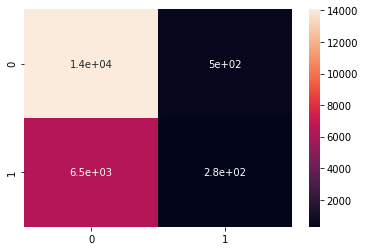

In [ ]:
SVM_model = pickle.load(open('svm_model.sav', 'rb'))
show_result(SVM_model, [feature[1], y_test]) #đây là tập cho test thử kết quả của nhóm em làm

Mặc dù accuracy thấp => model không tốt

accuracy = 0.8561742972499429


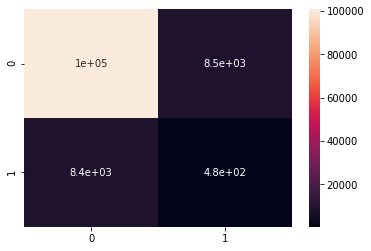

In [ ]:
show_result(SVM_model, [feature_LP, y_test_LP]) #data của bạn Lan Phương

Mặc dù accuracy khá tốt mà mà nhìn vào confusion matrix thì thấy rõ là model detection các headline sarcasm không tốt.
Mà cái nhìn lại cái nhan đề bài tập là 'Sarcasm detection' => model ko tốt.

###**Naive Bayes**

In [ ]:
#create model Multinomial Naive Bayes
MNB_model = MultinomialNB().fit(feature[0], y_train)

accuracy = 0.693350851672845


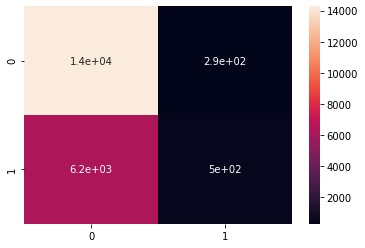

In [ ]:
show_result(MNB_model, [feature[1], y_test])

Cũng tương tự như trên model lại rất cũng xấu - có vẻ khâu xử lý dữ liệu chưa thốt hoặc data không tốt.

accuracy = 0.9025587635323294


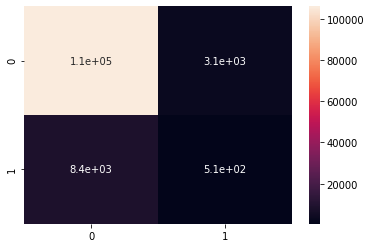

In [ ]:
show_result(MNB_model, [feature_LP, y_test_LP])

Như trên accuracy cao là do headline Non-sarcasm nhiều thôi

> Giải thích: là do data lượng chêch lệch dữ liệu giữa Non-sarcasm và sarcasm, cụ thể Non-sarcasm > sarcasm nên model train mới có việc dự đoán tin sarsasm không dc tốt

# **NLP/Word Embeddings**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

##**Processing data**

In [ ]:
nltk.download('stopwords')
def processing_tokenizer(text):
  remove_punc = [char for char in text if char not in string.punctuation]
  sent = ''.join(remove_punc)
  result = [word for word in sent.split() if word.lower() not in stopwords.words('english')]
  return ' '.join(result)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_sequences(text, tokenizer, train=True, max_length=None):
  sequences = tokenizer.texts_to_sequences(text)
  if train is True:
    max_length = np.max(list(map(lambda x: len(x), sequences)))

  sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
  return sequences

In [ ]:
#Xử lý dữ liệu
def preprocess(df_train, df_test):
  X_train, y_train = df_train['headline'].apply(processing_tokenizer), df_train['is_sarcastic']
  X_test, y_test = df_test['headline'].apply(processing_tokenizer), df_test['is_sarcastic']

  tokenizer = Tokenizer(num_words=30000)
  tokenizer.fit_on_texts(X_train)

  X_train = get_sequences(X_train, tokenizer,train=True)
  X_test = get_sequences(X_test, tokenizer, train=False, max_length=X_train.shape[1])

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess(df_train, df_test)

In [ ]:
def process_simple_data(data):
  
  X, y = data['headline'].apply(processing_tokenizer), data['is_sarcastic']

  tokenizer = Tokenizer(num_words=30000)
  tokenizer.fit_on_texts(X)

  X = get_sequences(X, tokenizer,train=False,max_length=36)

  return X, y

In [ ]:
X_test_LP, y_test_LP = process_simple_data(df_test_LanPhuong)

##**Training**

In [ ]:
#embedding layer
inputs = tf.keras.Input(shape=(36,))
embedding = tf.keras.layers.Embedding(
    input_dim=30000,
    output_dim=64
)(inputs)

flatten = tf.keras.layers.Flatten()(embedding)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)

final_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


final_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 36, 64)            1920000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2305      
Total params: 1,922,305
Trainable params: 1,922,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = final_model.fit(
    X_train, y_train,
    validation_split = 0.2,
    batch_size=32,
    epochs=5,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(
                   monitor='val_loss',
                   patience=4,
                   restore_best_weights=True
               )
    ]
)

In [ ]:
filename = 'embeddingmodel.sav'
final_model.save(filename)

In [ ]:
result = final_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', result[0])
print('Accuracy:', result[1])
print('AUC: ', result[2])

Test loss: 0.8028551936149597
Accuracy: 0.6845760345458984
AUC:  0.6600672006607056


#**Nhận xét**

>Có thể thấy model chưa tốt

>Mặc dù có test trên tập data khác, mà phần lớn là model dự đoán label 1 sai tức là các câu sarcastic sai.

>Có thể là do data chauw được tốt, và khâu xử lý chưa chỉnh chủ.